# Prediciendo si un cliente pagará su tarjeta de crédito con ANN (Artificial Neural Networks)

En primer lugar, importamos las librerías necesarias para leer los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importemos el dataset

In [2]:
dataset = pd.read_csv('default_of_credit_card_clients.csv')

Veamos la estructura del dataset viendo las primeras lineas del mismo

In [3]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Observamos que la primera columna contiene el id del cliente y no tiene una etiqueta de columna, esta información no tiene significado estadístico por
lo que la eliminaremos

De la misma manera, el dataset contiene una línea adicional que explica las variables independientes *X1..X23* y 
la variable independiente *y*, eliminaremos también esta línea

## Explicación de las variables del modelo

**Fuente**:

Name: I-Cheng Yeh 
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw 
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2)
Department of Civil Engineering, Tamkang University, Taiwan. 
other contact information: 886-2-26215656 ext. 3181 


**Información del Data set**:

"This research aimed at the case of customer default payments in Taiwan. 
From the perspective of risk management, the result of predictive accuracy of the estimated probability of
default will be more valuable than the binary result of classification - credible or not credible clients." 


**Información de las variables:**

**X1**: Monto autorizado de la tarjeta de crédito, comprende también las tarjetas adicionales del grupo familiar

**X2**: Género (1 = Hombre, 2 = Mujer)

**X3**: Estudios (1 = Educación Básica, 2 = Universidad, 3 = Educación Media, 4 = Otros )

**X4**: Estado Civil (1 = casada/o, 2 = soltera/o, 3 = Otros)

**X5**: Edad (En años enteros)

**X6 - X11**: Histórico de pagos mensuales de abril a septiembre 2005, X6 = Estado de pago a septiembre 2005,
    X7 = Estado de pago a agosto 2005, ...X11 = Estado de pago a abril 2005. Los valores posibles son -n: número de 
        pagos adelantados, 0: pago al día y +n: número de pagos retrasados.

**X12 - X17**: Monto facturado mensual. X12 = monto facturado a septiembre 2005, X13 = Monto facturado a 
    agosto 2005,..., X17 = monto facturado a abril 2005

**X18 - X23**: Monto de los pagos anteriores. X18 = Monto pagado en septiembre 2005, X19 = Monto pagado en 
    agosto 2005,..., X23 = Monto pagado en abril 2005.

## Limpieza de datos... ##

Eliminemos la primera línea, crearemos un dataset de trabajo, manteniendo el original para consulta si es necesario

In [4]:
wds = dataset.drop(dataset.index[0])

Eliminemos la columna del id (sin nombre de columna)

In [5]:
wds = wds.drop(['Unnamed: 0'], axis=1)

Recuperemos los nombres de las columnas para poder filtrar el working dataset en variables dependientes y la 
independiente por separado

In [6]:
wds_cols = list(wds.columns)

Veamos los nombres de las columnas

In [7]:
print(wds_cols)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']


Todo OK, hemos eliminado la columna no deseada y las filas de explicaciones

## Visualización Distribución Variables Independientes ##

Distribuciones de "Monto Autorizado" y "Edad"

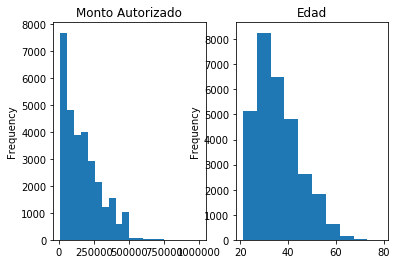

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X1'].astype(int).plot.hist(ax=axes[0], bins=20); axes[0].set_title('Monto Autorizado');
wds['X5'].astype(int).plot.hist(ax=axes[1],bins=10); axes[1].set_title('Edad');

Distribuciones de "Monto Facturado Sept" y "Monto Pagado Sept"

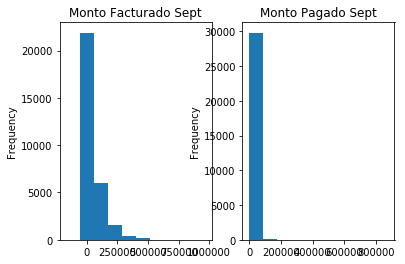

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X12'].astype(int).plot.hist(ax=axes[0], bins=10); axes[0].set_title('Monto Facturado Sept');
wds['X18'].astype(int).plot.hist(ax=axes[1], bins=10); axes[1].set_title('Monto Pagado Sept');

Distribuciones de "Monto Facturado Ago" y "Monto Pagado Ago"

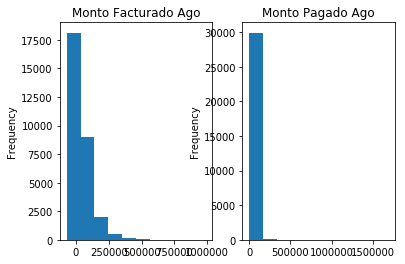

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X13'].astype(int).plot.hist(ax=axes[0], bins=10); axes[0].set_title('Monto Facturado Ago');
wds['X19'].astype(int).plot.hist(ax=axes[1], bins=10); axes[1].set_title('Monto Pagado Ago');

Distribuciones de "Monto Facturado Jul" y "Monto Pagado Jul"

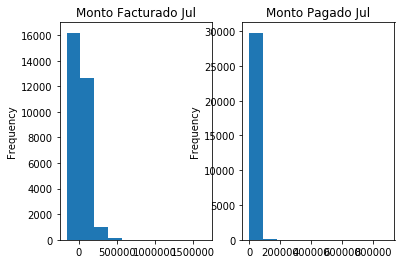

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X14'].astype(int).plot.hist(ax=axes[0], bins=10); axes[0].set_title('Monto Facturado Jul');
wds['X20'].astype(int).plot.hist(ax=axes[1], bins=10); axes[1].set_title('Monto Pagado Jul');

Distribuciones de "Monto Facturado Jun" y "Monto Pagado Jun"

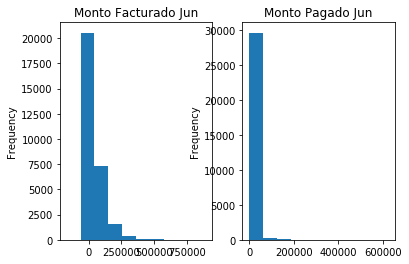

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X15'].astype(int).plot.hist(ax=axes[0], bins=10); axes[0].set_title('Monto Facturado Jun');
wds['X21'].astype(int).plot.hist(ax=axes[1], bins=10); axes[1].set_title('Monto Pagado Jun');

Distribuciones de "Monto Facturado May" y "Monto Pagado May"

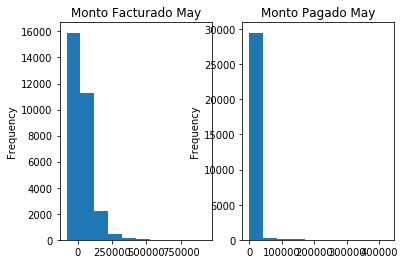

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X16'].astype(int).plot.hist(ax=axes[0], bins=10); axes[0].set_title('Monto Facturado May');
wds['X22'].astype(int).plot.hist(ax=axes[1], bins=10); axes[1].set_title('Monto Pagado May');

Distribuciones de "Monto Facturado Abri" y "Monto Pagado Abri"

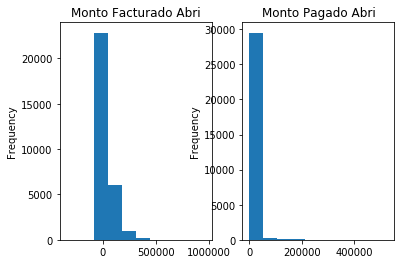

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
wds['X17'].astype(int).plot.hist(ax=axes[0], bins=10); axes[0].set_title('Monto Facturado Abri');
wds['X23'].astype(int).plot.hist(ax=axes[1], bins=10); axes[1].set_title('Monto Pagado Abri');

Separemos el working dataset en las variables dependientes X, y la independiente y

Crearemos los arreglos X_cols que recuperan las columnas de las variables independientes y y_cols de la variable 
dependiente a predecir

In [15]:
X_cols = wds_cols[0:-1]  # Todo menos la última columna

In [16]:
print(X_cols)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [17]:
y_col = wds_cols[-1]

In [18]:
print(y_col)

Y


Atención y_col no es una lista, es una cadena simple

Separemos en X_wds y y_wds el working dataset

In [19]:
X_wds = wds.filter(items=X_cols)

In [20]:
y_wds = wds.filter(items=[y_col]) # Debemos hacer una lista por la firma del método

Vemos ambos datasets

In [21]:
X_wds.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
y_wds.head()

,Y
1,1
2,1
3,0
4,0
5,0


De la descripción de las variables observamos que X2,X3,X4,X6,X7,X8,X9,X10 y X11 son variables categóricas. 
Sin embargo X2, sólo tiene dos valores por lo que tan sólo necesitamos codificar las variables X2,X3,X6..X11

In [23]:
X_wds = pd.get_dummies(X_wds, columns = ['X3','X4','X6','X7','X8','X9','X10','X11'], drop_first = True)

In [24]:
X_wds.head()

,X1,X2,X5,X12,X13,X14,X15,X16,X17,X18,...,X10_8,X11_-2,X11_0,X11_2,X11_3,X11_4,X11_5,X11_6,X11_7,X11_8
1,20000,2,24,3913,3102,689,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,120000,2,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
3,90000,2,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
4,50000,2,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
5,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


**Vemos que ahora el modelo contiene 82 variables independientes!!!!**

## Separación en conjunto de entrenamiento y conjunto de test ##

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wds.iloc[:,:].values, 
                                                    y_wds.iloc[:,:].values, 
                                                    test_size = 0.2, random_state = 0)

## Normalización de las variables para el modelo ANN ##

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test = sc.transform(X_test.astype(float))

## Construyendo el modelo ANN ##

In [27]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/juan-pablo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


### Inicializando el ANN ##

In [28]:
classifier = Sequential()

Utilizaremos una red con tres capas, la de input, una oculta y una de salida

El modelo tiene 82 variables independientes con las que inicializamos la capa de input (input_dim =82) y consideramos 42 nodos ((82+1)/2 rule of thumb).
E iniciamos los pesos con una distribución uniforme.
Finalmente, la función de rectificación es relu.

In [29]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = 'relu', input_dim = 82, units = 42, kernel_initializer = 'uniform'))

In [30]:
# Adding the second hidden layer
classifier.add(Dense(activation = 'relu',units = 42, kernel_initializer = 'uniform'))

En el caso de la capa de salida utilizamos la función de rectificación sigmoid para generar las probabilidades

In [31]:
# Adding the output layer
classifier.add(Dense(activation = 'sigmoid',units = 1, kernel_initializer = 'uniform'))

### Compilando el ANN ###

La métrica para definir la exactitud es 'accuracy', la función de costo es 'binary_crossentropy', y utilizamos 
el optimizador 'adam'

In [32]:
# Compiling the ANN
classifier.compile (optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Hacemos ahora entrenar al modelo ANN ###

**Generamos dos objectos History para utilizarlos como callbacks al final de las épocas y calcular por ejemplo 
la exactitud**

In [33]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = LossHistory()
history2 = AccHistory()

Utilizamos un batch de 10 (cada 10 valores recalculamos) y 100 épocas (100 corridas completas)

In [34]:
# Fitting the ANN to the Training set
classifier.fit (X_train, y_train, batch_size = 10, epochs = 100, callbacks=[history, history2])

Epoch 1/100
24000/24000 [==============================] - 1s 48us/step - loss: 0.4454 - acc: 0.8142
Epoch 2/100
24000/24000 [==============================] - 1s 54us/step - loss: 0.4352 - acc: 0.8199
Epoch 3/100
24000/24000 [==============================] - 1s 46us/step - loss: 0.4326 - acc: 0.8203: 0s - loss: 0.
Epoch 4/100
24000/24000 [==============================] - 1s 45us/step - loss: 0.4304 - acc: 0.8216
Epoch 5/100
24000/24000 [==============================] - 1s 46us/step - loss: 0.4295 - acc: 0.8226
Epoch 6/100
24000/24000 [==============================] - 1s 52us/step - loss: 0.4276 - acc: 0.8237
Epoch 7/100
24000/24000 [==============================] - 1s 48us/step - loss: 0.4267 - acc: 0.8235
Epoch 8/100
24000/24000 [==============================] - 1s 46us/step - loss: 0.4262 - acc: 0.8245
Epoch 9/100
24000/24000 [==============================] - 1s 46us/step - loss: 0.4250 - acc: 0.8232
Epoch 10/100
24000/24000 [==============================] - 1s 48us/step - l

24000/24000 [==============================] - 1s 42us/step - loss: 0.3513 - acc: 0.8548
Epoch 82/100
24000/24000 [==============================] - 1s 43us/step - loss: 0.3523 - acc: 0.8532
Epoch 83/100
24000/24000 [==============================] - 1s 42us/step - loss: 0.3513 - acc: 0.8534
Epoch 84/100
24000/24000 [==============================] - 1s 42us/step - loss: 0.3503 - acc: 0.8547
Epoch 85/100
24000/24000 [==============================] - 1s 44us/step - loss: 0.3500 - acc: 0.8557
Epoch 86/100
24000/24000 [==============================] - 1s 42us/step - loss: 0.3507 - acc: 0.8550
Epoch 87/100
24000/24000 [==============================] - 1s 45us/step - loss: 0.3486 - acc: 0.8562
Epoch 88/100
24000/24000 [==============================] - 1s 47us/step - loss: 0.3512 - acc: 0.8555
Epoch 89/100
24000/24000 [==============================] - 1s 43us/step - loss: 0.3489 - acc: 0.8557
Epoch 90/100
24000/24000 [==============================] - 1s 43us/step - loss: 0.3475 - acc: 

Verificamos la exactitud del ANN sobre el conjunto de entrenamiento

In [35]:
print("Precisión después de 100 épocas:",history2.acc[-1])

Precisión después de 100 épocas: 0.8571666607260704


### Evolución de la precisión ###

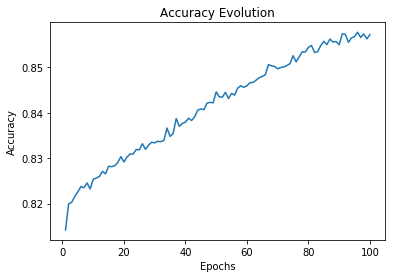

In [36]:
# Visualization of acc evolution between epochs
x_vals = list(range(1,101))
y_vals = history2.acc
plt.plot(x_vals, y_vals)
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Predicción del conjunto de test ##

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Visualización de la distribución de la predicción ###

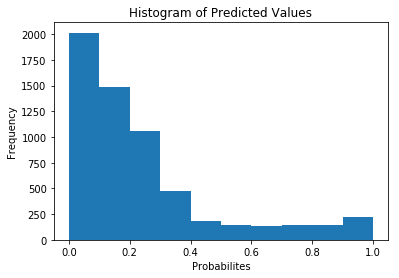

In [38]:
# Histogram of predicted values
plt.hist(y_pred, bins=10)
plt.title('Histogram of Predicted Values')
plt.xlabel('Probabilites')
plt.ylabel('Frequency')
plt.show()